# Steps to solve -

# 1. Read the data.
# 2. Cleaning the data.
# 3. Prepared the data for model.
# 4. Model.
# 5. Final Result.

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.metrics import silhouette_score

# 1. Read the data

In [121]:
df = pd.read_csv("OnlineRetail.csv",encoding="ISO-8859-1",header=0)

In [122]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


# 2. Cleaning data

In [124]:
# cleaning
round(100*(df.isnull().sum())/len(df),2)

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [125]:
#drop all missing values rows
df=df.dropna()

In [126]:
df.shape

(406829, 8)

In [127]:
df['Amount'] = df['Quantity']* df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


# 3. Prepare the dataset

- 1.Recency : Number of days since last purchase
- 2.Frequency : Number of transactions
- 3.Monetary Value : Total amount of transactions

In [128]:
#monetary
grouped = df.groupby('CustomerID')['Amount'].sum()

In [129]:
grouped = grouped.reset_index()
grouped.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [130]:
#frequency
frequency = df.groupby('CustomerID')['InvoiceNo'].count()
frequency = frequency.reset_index()
frequency.columns=['CustomerID','Frequency']
frequency.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [131]:
grouped = pd.merge(grouped,frequency,on="CustomerID",how='inner')

In [132]:
grouped.head()

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [133]:
#recency
#first step is to convert datatype of invoicedate coluumn from object to datetime.
df['InvoiceDate']= pd.to_datetime(df['InvoiceDate'],format='%d-%m-%Y %H:%M')

In [134]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [135]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
Amount                float64
dtype: object

In [136]:
max_date= max(df['InvoiceDate'])

In [137]:
max_date

Timestamp('2011-12-09 12:50:00')

In [138]:
#compute the diff between each transaction and max
df['diff'] = max_date - df['InvoiceDate']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [139]:
#Recency column
recency = df.groupby('CustomerID')['diff'].min()
recency = recency.reset_index()
recency.columns = ['CustomerID','Recency']
recency.head()

,CustomerID,Recency
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [140]:
grouped = pd.merge(grouped,recency,on="CustomerID",how='inner')
grouped.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325 days 02:33:00
1,12347.0,4310.00,182,1 days 20:58:00
2,12348.0,1797.24,31,74 days 23:37:00
3,12349.0,1757.55,73,18 days 02:59:00
4,12350.0,334.40,17,309 days 20:49:00


In [141]:
#we just need number of days in recency column
grouped['Recency'] = grouped['Recency'].dt.days
grouped.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


<AxesSubplot:ylabel='Recency'>

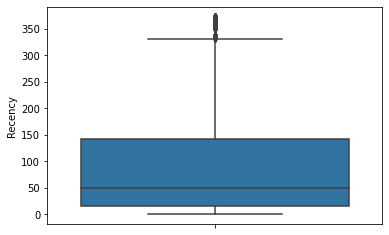

In [142]:
#1.outlier treatment
sns.boxplot(data=grouped,y="Recency")

In [170]:
#outliers
Q1 = grouped.Amount.quantile(0.05)
Q3 = grouped.Amount.quantile(0.95)
IQR = Q3-Q1
grouped = grouped[(grouped.Amount>=Q1-1.5*IQR) & (grouped.Amount<=Q3+1.5*IQR)]

Q1 = grouped.Recency.quantile(0.05)
Q3 = grouped.Recency.quantile(0.95)
IQR = Q3-Q1
grouped = grouped[(grouped.Recency>=Q1-1.5*IQR) & (grouped.Recency<=Q3+1.5*IQR)]

Q1 = grouped.Frequency.quantile(0.05)
Q3 = grouped.Frequency.quantile(0.95)
IQR = Q3-Q1
grouped = grouped[(grouped.Frequency>=Q1-1.5*IQR) & (grouped.Frequency<=Q3+1.5*IQR)]

In [172]:
Scaled = grouped[['Amount','Recency','Frequency']]
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Scaled = sc.fit_transform(Scaled)
Scaled.shape

(4271, 3)

In [174]:
Scaled = pd.DataFrame(data=Scaled,columns=['Amount','Recency','Frequency'])
Scaled.head()

,Amount,Recency,Frequency
0,-0.759639,2.295613,-0.771795
1,1.916220,-0.910045,1.117217
2,0.356175,-0.187782,-0.467454
3,0.331534,-0.741847,-0.026685
4,-0.552027,2.137309,-0.614377


# 4. Model

In [175]:
#Model
from sklearn.cluster import KMeans
KM = KMeans(n_clusters=3,max_iter=50)
KM.fit(Scaled)

KMeans(max_iter=50, n_clusters=3)

In [176]:
KM.labels_

array([2, 0, 1, ..., 2, 1, 1])

# Finding the optimal number of clusters

In [164]:
# #elbow-curve/SSD
# import warnings as wr
# wr.filterwarnings('ignore')
# ssd = []
# fig, ax = plt.subplots()
# number_of_clusters = [2,3,4,5,6,7,8]
# for i in number_of_clusters:
#     kmeans = KMeans(n_clusters=i,max_iter=50)
#     kmeans.fit(Scaled)
#     ssd.append(kmeans.inertia_)

# ax.plot(ssd)
# ax.set_xticklabels((1, 2,3,4, 5 ,6,7,8))
# fig.show()

In [165]:
# range_n_clusters = [2,3,4,5,6,7,8]
# for num in range_n_clusters:
#     Kmeans = KMeans(n_clusters=num,max_iter=50)
#     Kmeans.fit(Scaled)
#     cluster_labels = Kmeans.labels_
    
#     silhouette_avg = silhouette_score(Scaled,cluster_labels)
#     print("For n_cluster={0}, the silhouette score is {1}".format(num,silhouette_avg))


In [177]:
grouped['cluster_id'] = KM.labels_
grouped.head(20)

,CustomerID,Amount,Frequency,Recency,cluster_id
0,12346.0,0.00,2,325,2
1,12347.0,4310.00,182,1,0
2,12348.0,1797.24,31,74,1
3,12349.0,1757.55,73,18,1
4,12350.0,334.40,17,309,2
5,12352.0,1545.41,95,35,1
6,12353.0,89.00,4,203,2
7,12354.0,1079.40,58,231,2
8,12355.0,459.40,13,213,2
9,12356.0,2811.43,59,22,1


In [178]:
import seaborn as sns

<AxesSubplot:xlabel='cluster_id', ylabel='Amount'>

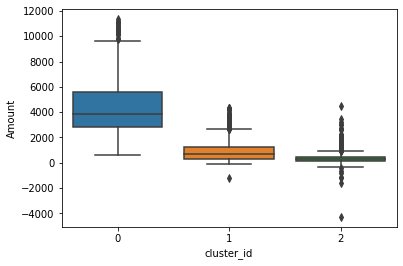

In [180]:
sns.boxplot(x="cluster_id",y="Amount",data=grouped)

<AxesSubplot:xlabel='cluster_id', ylabel='Recency'>

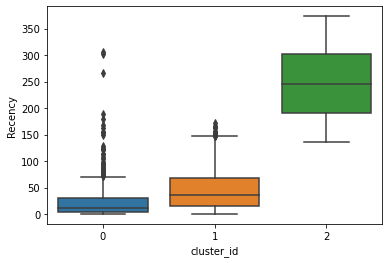

In [181]:
sns.boxplot(x="cluster_id",y="Recency",data=grouped)

<AxesSubplot:xlabel='cluster_id', ylabel='Frequency'>

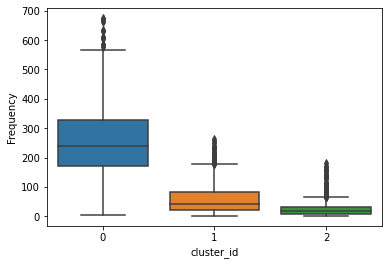

In [182]:
sns.boxplot(x="cluster_id",y="Frequency",data=grouped)

In [ ]:
#Result: By the graph we can easily say the people which lies in cluster 0 are the most valuable customers for the company.